In [1]:
import pandas as pd
import requests
import plotly.express as px
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

soup = BeautifulSoup(req.content, 'lxml')

In [3]:
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

,Total Traveler Throughput,Total Traveler Throughput (1 Year Ago - Same Weekday)
Date,,
2021-01-09,709444,1687974
2021-01-08,772471,2072543
2021-01-07,771734,2034472
2021-01-06,665855,1815040
2021-01-05,766594,1806480
...,...,...
2020-06-28,633810,2632030
2020-06-27,546310,2368846
2020-06-26,632984,2730515


In [4]:
df = df.rename(columns={'Total Traveler Throughput':'Present',
                        'Total Traveler Throughput (1 Year Ago - Same Weekday)':'One Year Ago'})

df['Difference in Travelers'] = df['Present'].sub(df['One Year Ago'])
df['% Change'] = df['Present'].sub(df['One Year Ago']).div(df['One Year Ago'])

display(df)

,Present,One Year Ago,Difference in Travelers,% Change
Date,,,,
2021-01-09,709444,1687974,-978530,-0.579707
2021-01-08,772471,2072543,-1300072,-0.627283
2021-01-07,771734,2034472,-1262738,-0.620671
2021-01-06,665855,1815040,-1149185,-0.633146
2021-01-05,766594,1806480,-1039886,-0.575642
...,...,...,...,...
2020-06-28,633810,2632030,-1998220,-0.759193
2020-06-27,546310,2368846,-1822536,-0.769377
2020-06-26,632984,2730515,-2097531,-0.768181


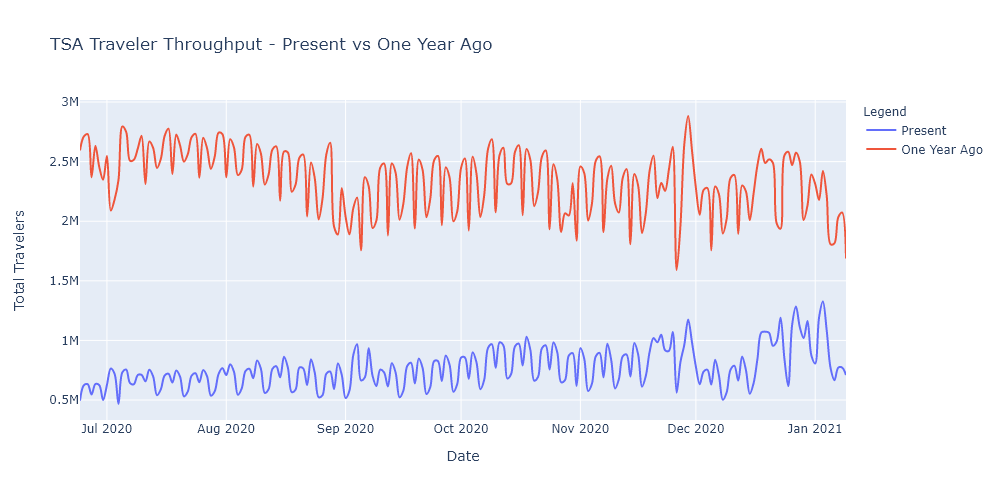

In [5]:
fig = px.line(df, y=['Present',
                     'One Year Ago'],
              line_shape='spline',
              title='TSA Traveler Throughput - Present vs One Year Ago',
              labels={'value':'Total Travelers',
                      'variable':'Legend'},)

fig.show(renderer="png", height=500, width=1000)